# Part 6 Random Forest Model

In [1]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

plt.rcParams['figure.dpi']= 150
sns.set(style="whitegrid")

## Split training data into training dataset and validation dataset

In [2]:
# Read cleaned training data
data = pd.read_csv("cleaned_train_data.csv")

# It is better to choose random_state=42
# Split training data into 80% training data and 20% validation data
train, test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)
print("train.shape: ", train.shape)
print("test.shape: ", test.shape)

X_train = train.comment_text
X_test = test.comment_text

train.shape:  (127656, 8)
test.shape:  (31915, 8)


In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
140030,ed56f082116dcbd0,grandma terri should burn in trash grandma ter...,1,0,0,0,0,0
159124,f8e3cd98b63bf401,may etc it would be easiest if you were to adm...,0,0,0,0,0,0
60006,a09e1bcf10631f9a,the objectivity of this discussion is doubtful...,0,0,0,0,0,0
65432,af0ee0066c607eb8,shelly shock shelly shock is,0,0,0,0,0,0
154979,b734772b1a807e09,i do not care refer to on ten hong talk page i...,0,0,0,0,0,0


In [4]:
test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
119105,7ca72b5b9c688e9e,geez are you forgetful weave already discussed...,0,0,0,0,0,0
131631,c03f72fd8f8bf54f,carioca fra thanks for your support on my requ...,0,0,0,0,0,0
125326,9e5b8e8fc1ff2e84,birthday no worries its what i do enjoy or day...,0,0,0,0,0,0
111256,5332799e706665a6,pseudoscience category i'm assuming that this ...,0,0,0,0,0,0
83590,dfa7d8f0b4366680,and if such phrase exists it would be provided...,0,0,0,0,0,0


## Search for tree number for random forest

In [5]:
tfidfVec = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidfVec.fit_transform(X_train)
X_test_tfidf = tfidfVec.transform(X_test)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(127656, 56192)
(31915, 56192)


In [56]:
train_scores = []
test_scores = []
for n in range(10, 50, 5):
    clf = RandomForestClassifier(criterion="entropy", n_estimators=n).fit(X_train_tfidf, train["toxic"])
    train_score = classification_report(train["toxic"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["toxic"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [57]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in range(10, 50, 5)], columns=["number_of_trees"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in range(10, 50, 5)], columns=["number_of_trees"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

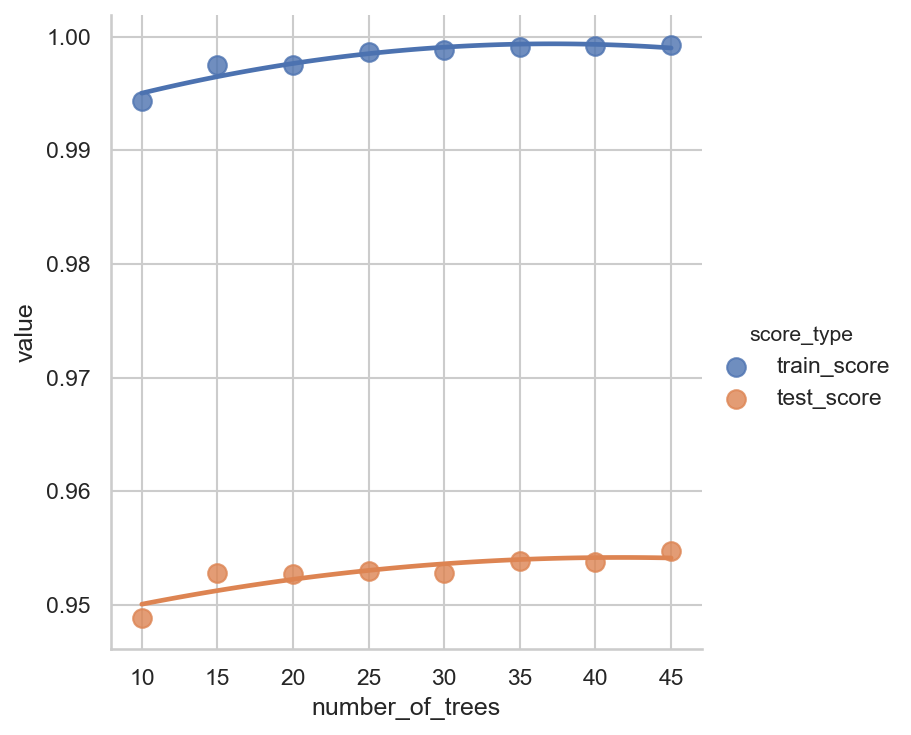

In [58]:
plt.rcParams['figure.dpi']= 150
ax = sns.lmplot(x="number_of_trees", y="value", hue="score_type", data=score_df, scatter_kws={"s": 80}, order=2, ci=None, truncate=True)

In [53]:
train_scores = []
test_scores = []
for n in range(10, 50, 5):
    clf = RandomForestClassifier(criterion="entropy", n_estimators=n).fit(X_train_tfidf, train["severe_toxic"])
    train_score = classification_report(train["severe_toxic"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["severe_toxic"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [54]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in range(10, 50, 5)], columns=["number_of_trees"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in range(10, 50, 5)], columns=["number_of_trees"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

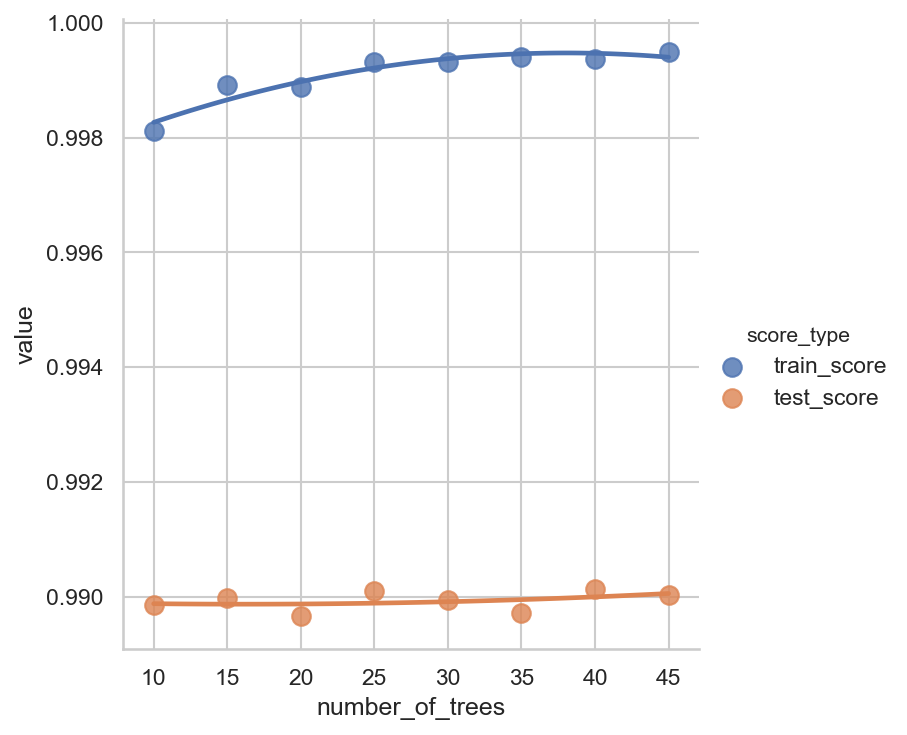

In [55]:
plt.rcParams['figure.dpi']= 150
ax = sns.lmplot(x="number_of_trees", y="value", hue="score_type", data=score_df, scatter_kws={"s": 80}, order=2, ci=None, truncate=True)

In [59]:
train_scores = []
test_scores = []
for n in range(10, 50, 5):
    clf = RandomForestClassifier(criterion="entropy", n_estimators=n).fit(X_train_tfidf, train["obscene"])
    train_score = classification_report(train["obscene"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["obscene"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [60]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in range(10, 50, 5)], columns=["number_of_trees"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in range(10, 50, 5)], columns=["number_of_trees"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

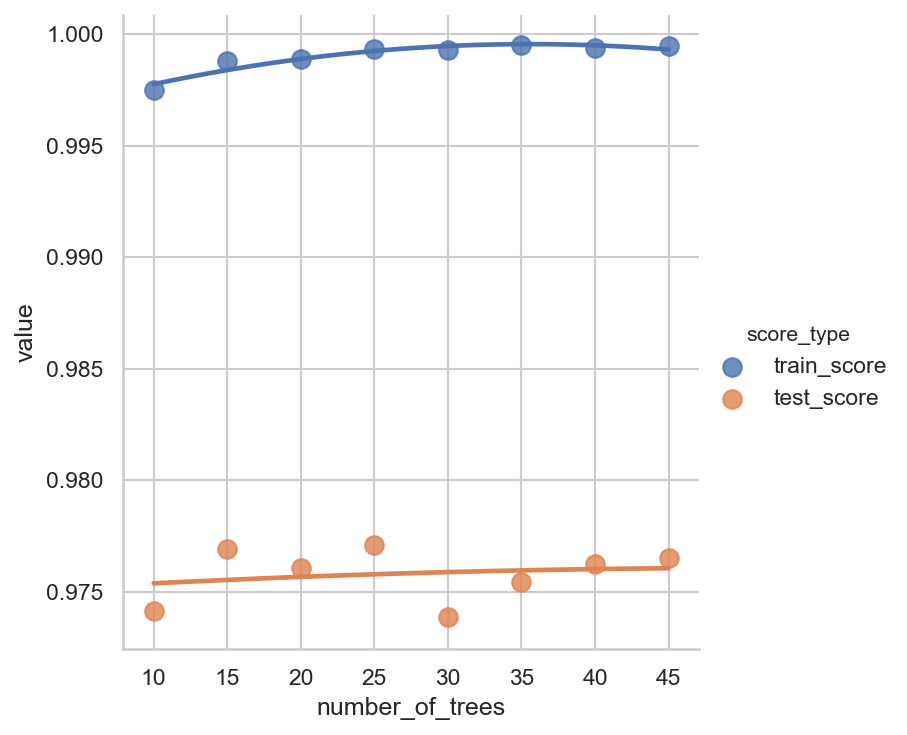

In [61]:
plt.rcParams['figure.dpi']= 150
ax = sns.lmplot(x="number_of_trees", y="value", hue="score_type", data=score_df, scatter_kws={"s": 80}, order=2, ci=None, truncate=True)

In [62]:
train_scores = []
test_scores = []
for n in range(10, 50, 5):
    clf = RandomForestClassifier(criterion="entropy", n_estimators=n).fit(X_train_tfidf, train["threat"])
    train_score = classification_report(train["threat"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["threat"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [63]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in range(10, 50, 5)], columns=["number_of_trees"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in range(10, 50, 5)], columns=["number_of_trees"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

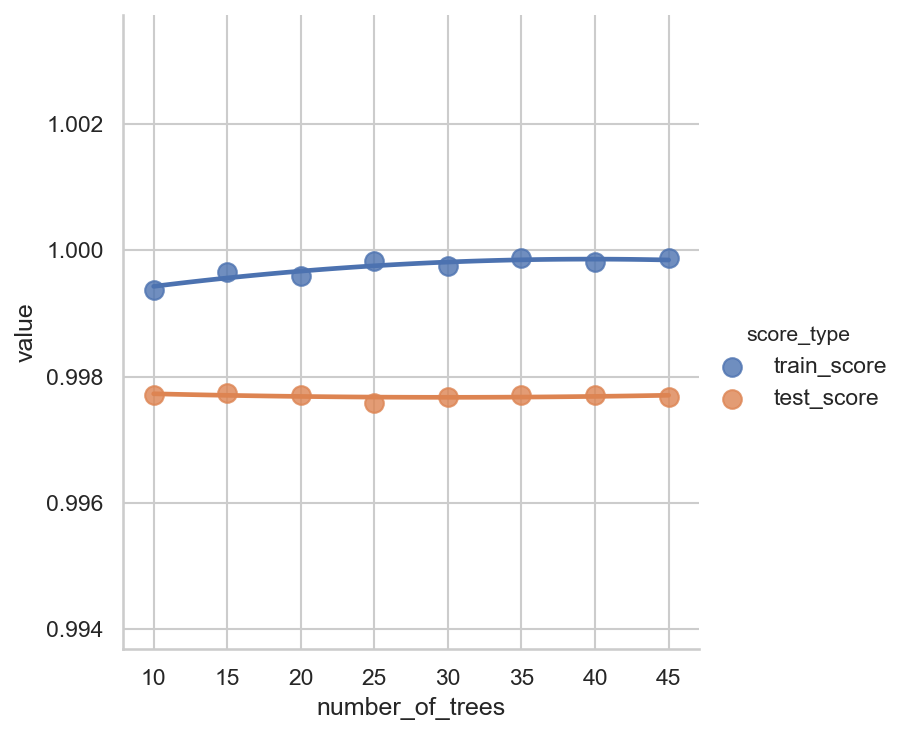

In [64]:
plt.rcParams['figure.dpi']= 150
ax = sns.lmplot(x="number_of_trees", y="value", hue="score_type", data=score_df, scatter_kws={"s": 80}, order=2, ci=None, truncate=True)

In [65]:
train_scores = []
test_scores = []
for n in range(10, 50, 5):
    clf = RandomForestClassifier(criterion="entropy", n_estimators=n).fit(X_train_tfidf, train["insult"])
    train_score = classification_report(train["insult"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["insult"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [66]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in range(10, 50, 5)], columns=["number_of_trees"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in range(10, 50, 5)], columns=["number_of_trees"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

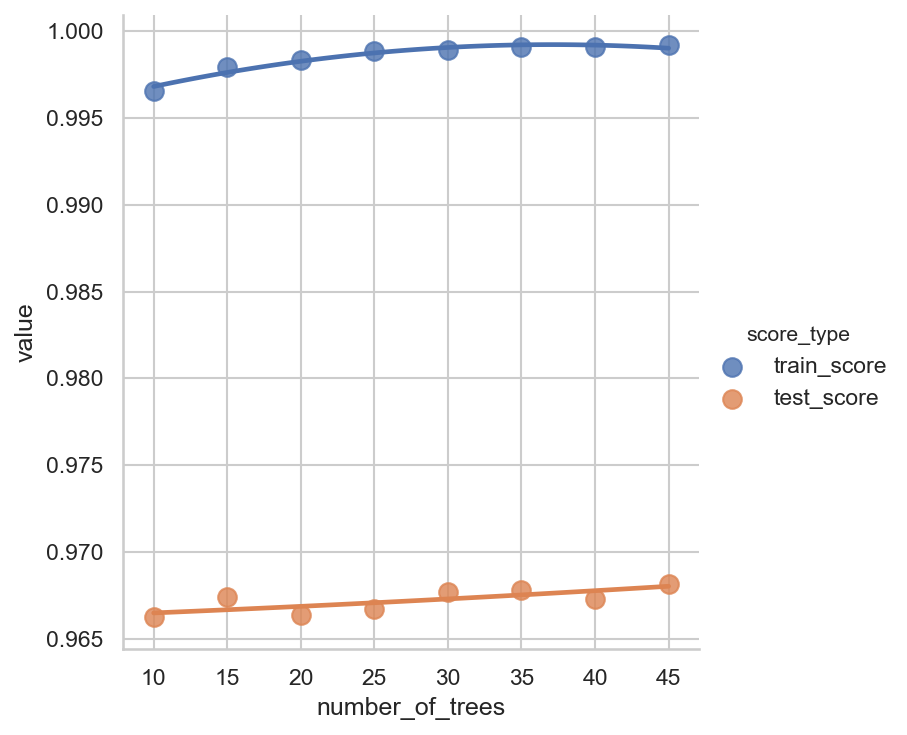

In [67]:
plt.rcParams['figure.dpi']= 150
ax = sns.lmplot(x="number_of_trees", y="value", hue="score_type", data=score_df, scatter_kws={"s": 80}, order=2, ci=None, truncate=True)

In [68]:
train_scores = []
test_scores = []
for n in range(10, 50, 5):
    clf = RandomForestClassifier(criterion="entropy", n_estimators=n).fit(X_train_tfidf, train["identity_hate"])
    train_score = classification_report(train["identity_hate"], clf.predict(X_train_tfidf), output_dict=True)
    test_score = classification_report(test["identity_hate"], clf.predict(X_test_tfidf), output_dict=True)
    train_scores.append(train_score["accuracy"])
    test_scores.append(test_score["accuracy"])

In [69]:
train_scores_df = pd.concat([pd.DataFrame(train_scores, columns=["value"]), pd.DataFrame([x for x in range(10, 50, 5)], columns=["number_of_trees"]), pd.DataFrame(["train_score"]*len(train_scores), columns=["score_type"])], axis=1)
test_scores_df = pd.concat([pd.DataFrame(test_scores, columns=["value"]), pd.DataFrame([x for x in range(10, 50, 5)], columns=["number_of_trees"]), pd.DataFrame(["test_score"]*len(test_scores), columns=["score_type"])], axis=1)
score_df = train_scores_df.append(test_scores_df, ignore_index=True)

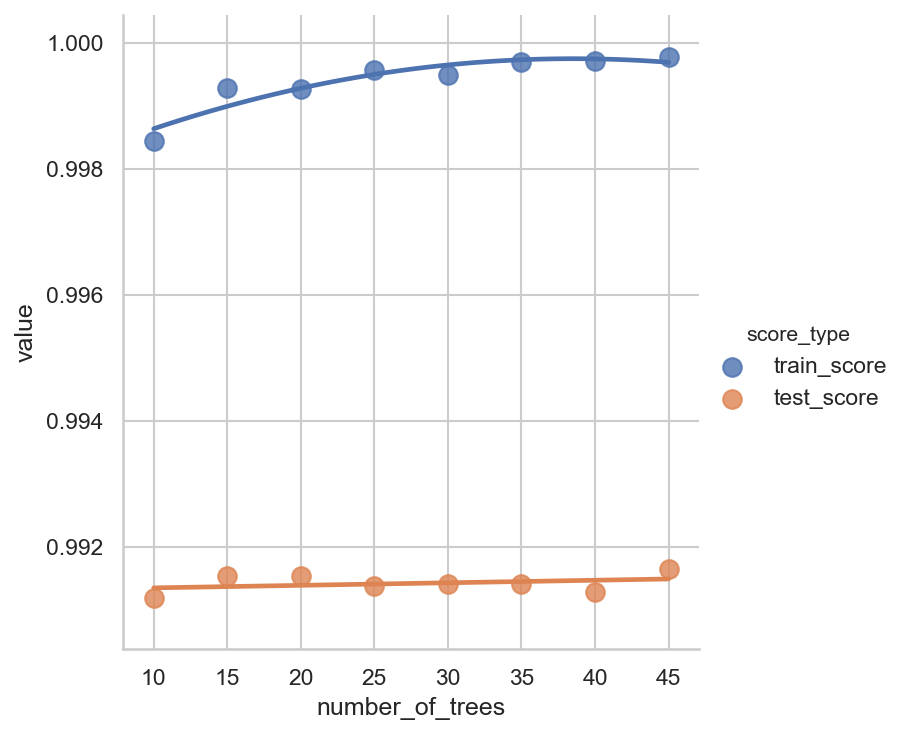

In [70]:
plt.rcParams['figure.dpi']= 150
ax = sns.lmplot(x="number_of_trees", y="value", hue="score_type", data=score_df, scatter_kws={"s": 80}, order=2, ci=None, truncate=True)

## Using cross validation to estimate Random Forest model

In [71]:
# sava number_of_tree parameter for each category
categories = {'toxic': 35, 'severe_toxic': 10, 'obscene': 15, 'threat': 10, 'insult': 35, 'identity_hate': 15}

fold = 10
results = pd.DataFrame()
cross_validation_score_name = ['roc_auc']

for category in categories:
    # initialise random forest classifier
    clf = make_pipeline(TfidfVectorizer(stop_words="english"), RandomForestClassifier(criterion="entropy", n_estimators=categories[category]))
    scores = cross_validate(clf, X_train, train[category], cv=fold, scoring="roc_auc")
    result = pd.DataFrame()
    for scn in cross_validation_score_name:
        result = result.append(pd.DataFrame(np.array([scores["test_score"],[scn]*fold]).T, columns=["value", "score_name"]), ignore_index=True)    
    cate = pd.DataFrame([category]*(len(cross_validation_score_name)*fold), columns=['category'])
    results = results.append(pd.concat([result, cate], axis=1), ignore_index=True)

results.head()

,value,score_name,category
0,0.9539517794063852,roc_auc,toxic
1,0.9487984986347107,roc_auc,toxic
2,0.9524742259868194,roc_auc,toxic
3,0.9522592891774627,roc_auc,toxic
4,0.9626468634586047,roc_auc,toxic


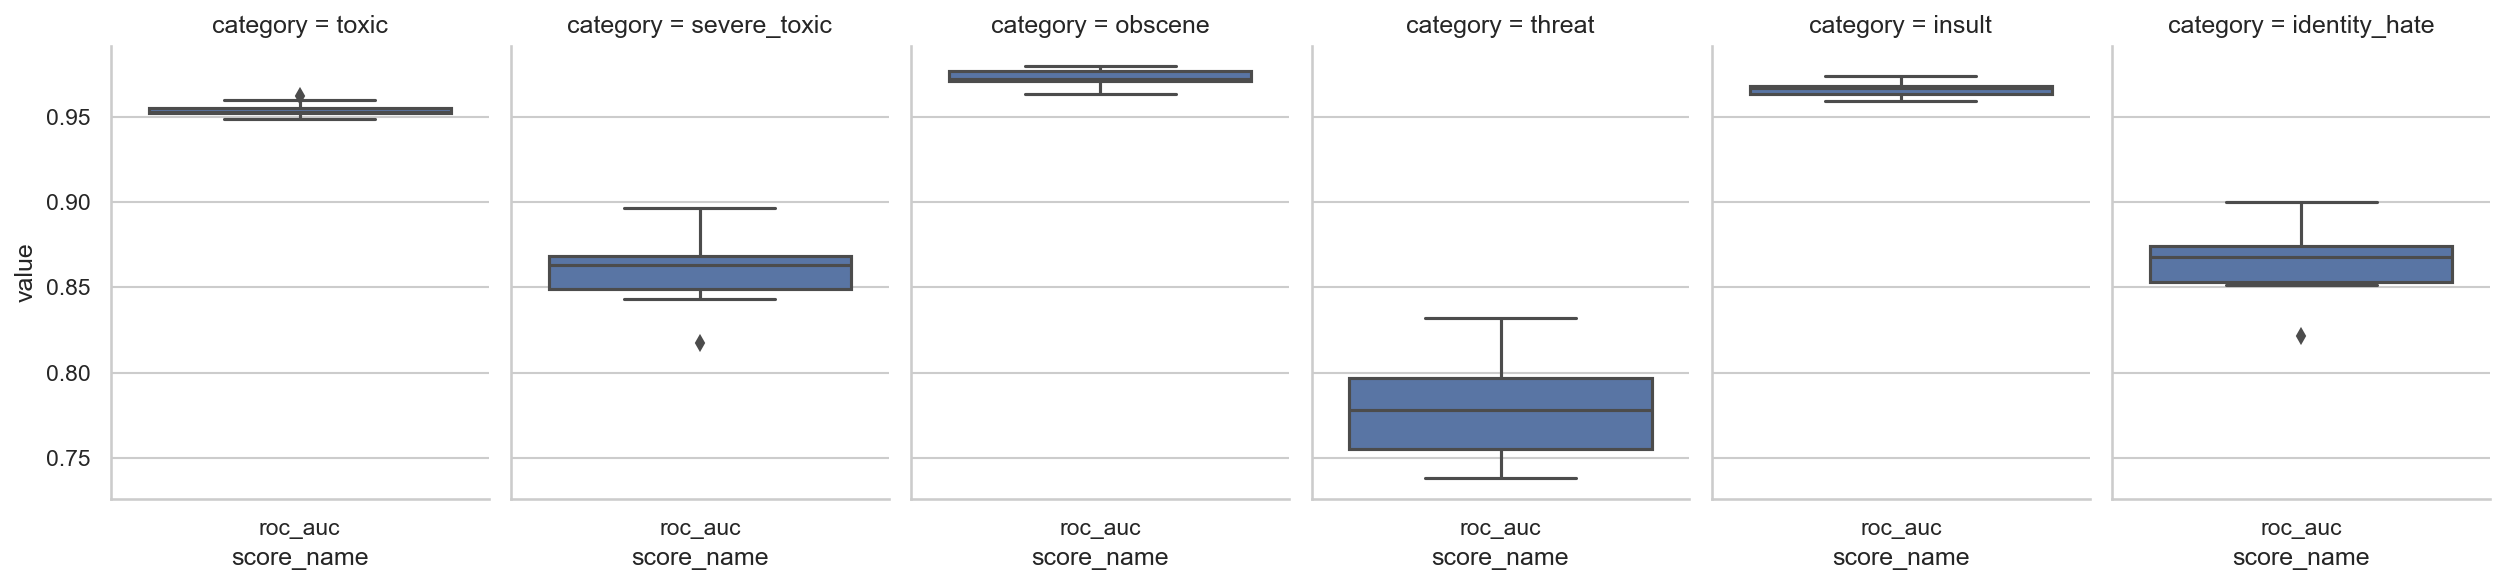

In [72]:
results["value"] = results.value.astype(float)
ax = sns.catplot(x="score_name", y="value", col="category", data=results, kind="box", height=4, aspect=.7);

In [73]:
compare = pd.concat([results,pd.DataFrame(["randomForest"]*60, columns=["model"])], axis=1)

In [74]:
compare.to_csv("randomForest.csv", index=False)

In [2]:
decisionTree = pd.read_csv("decisionTree_cross_validation.csv")
randomForest = pd.read_csv("randomForest.csv")

In [4]:
randomForest.head()

,value,score_name,category,model
0,0.953952,roc_auc,toxic,randomForest
1,0.948798,roc_auc,toxic,randomForest
2,0.952474,roc_auc,toxic,randomForest
3,0.952259,roc_auc,toxic,randomForest
4,0.962647,roc_auc,toxic,randomForest


In [5]:
decisionTree.head()

,value,score_name,category,param
0,0.794382,roc_auc,toxic,decisionTree_cross_validation
1,0.795628,roc_auc,toxic,decisionTree_cross_validation
2,0.794078,roc_auc,toxic,decisionTree_cross_validation
3,0.798147,roc_auc,toxic,decisionTree_cross_validation
4,0.794038,roc_auc,toxic,decisionTree_cross_validation


In [8]:
decisionTree.columns=["value", "score_name", "category", "model"]

In [9]:
decisionTree.head()

,value,score_name,category,model
0,0.794382,roc_auc,toxic,decisionTree_cross_validation
1,0.795628,roc_auc,toxic,decisionTree_cross_validation
2,0.794078,roc_auc,toxic,decisionTree_cross_validation
3,0.798147,roc_auc,toxic,decisionTree_cross_validation
4,0.794038,roc_auc,toxic,decisionTree_cross_validation


In [10]:
compare = randomForest.append(decisionTree, ignore_index=True)

In [16]:
compare["model"] = compare["model"].apply(lambda x: "randomForest" if x == "randomForest" else "decisionTree")

In [17]:
compare

,value,score_name,category,model
0,0.953952,roc_auc,toxic,randomForest
1,0.948798,roc_auc,toxic,randomForest
2,0.952474,roc_auc,toxic,randomForest
3,0.952259,roc_auc,toxic,randomForest
4,0.962647,roc_auc,toxic,randomForest
5,0.950353,roc_auc,toxic,randomForest
6,0.955939,roc_auc,toxic,randomForest
7,0.952067,roc_auc,toxic,randomForest
8,0.953963,roc_auc,toxic,randomForest
9,0.960088,roc_auc,toxic,randomForest


In [13]:
compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
value         120 non-null float64
score_name    120 non-null object
category      120 non-null object
model         120 non-null object
dtypes: float64(1), object(3)
memory usage: 3.9+ KB


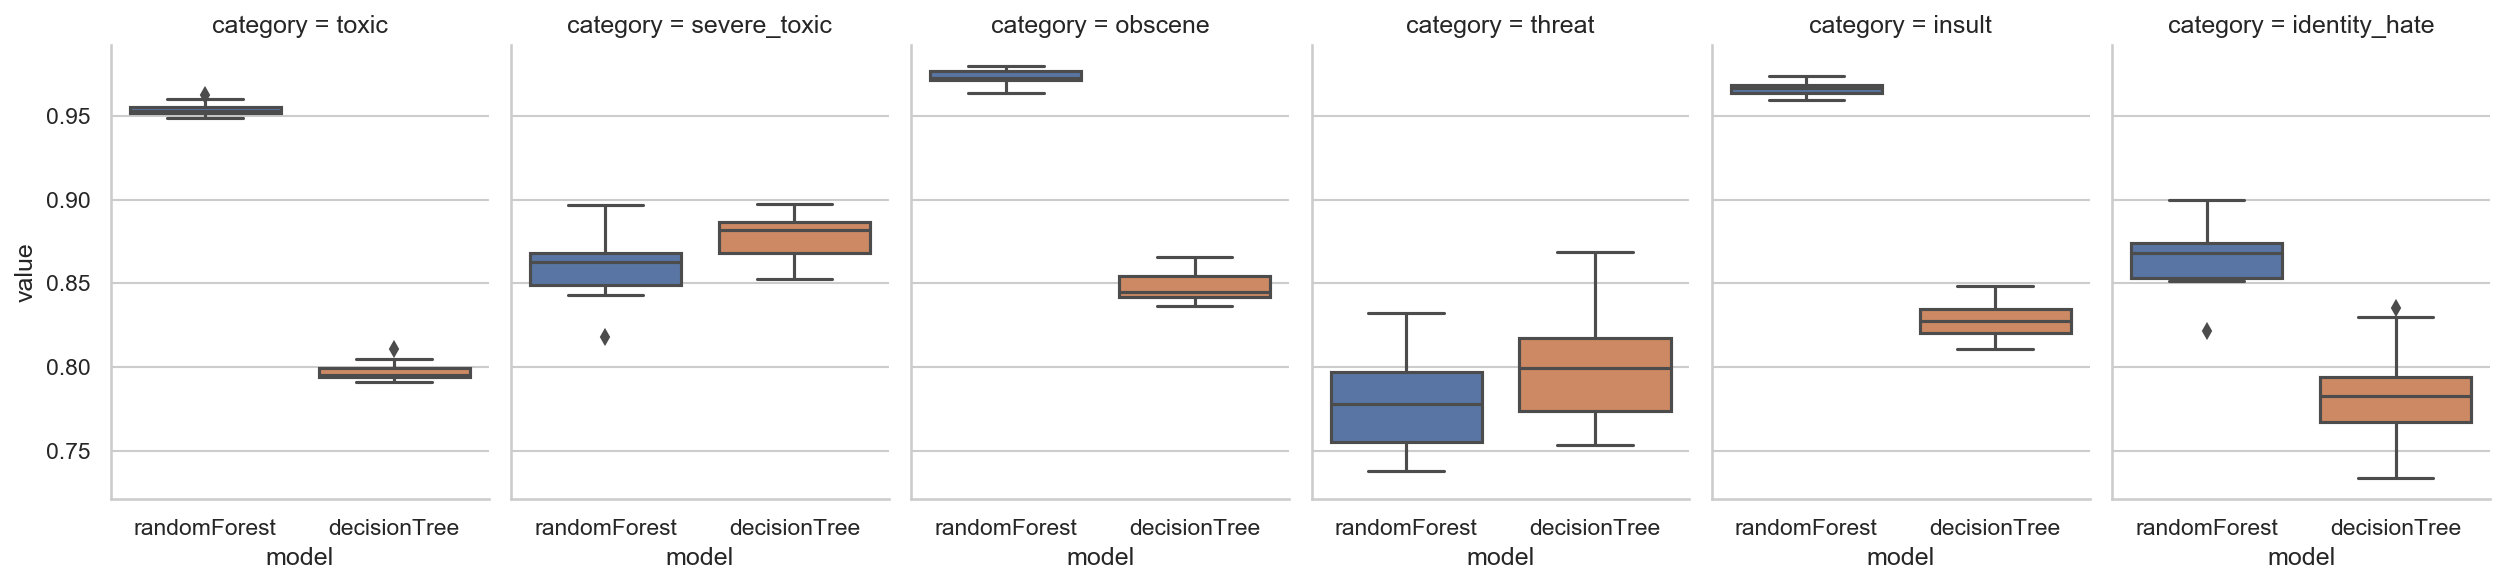

In [18]:
# results["value"] = results.value.astype(float)
plt.rcParams['figure.dpi']= 150
ax = sns.catplot(x="model", y="value", col="category", data=compare, kind="box", height=4, aspect=.7);

## Estimate Random Forest on validation data using ROC

In [75]:
# Initialise TfidfVectorizer and fit all the splitted training data
tfidf_vect = TfidfVectorizer(stop_words="english")
X_train_vec = tfidf_vect.fit_transform(X_train)
print('X_train_vec.shape: ', X_train_vec.shape)

testSetX_vec = tfidf_vect.transform(X_test)
print('testSetX_vec.shape: ', testSetX_vec.shape)

X_train_vec.shape:  (127656, 56192)
testSetX_vec.shape:  (31915, 56192)


In [76]:
categoryName = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

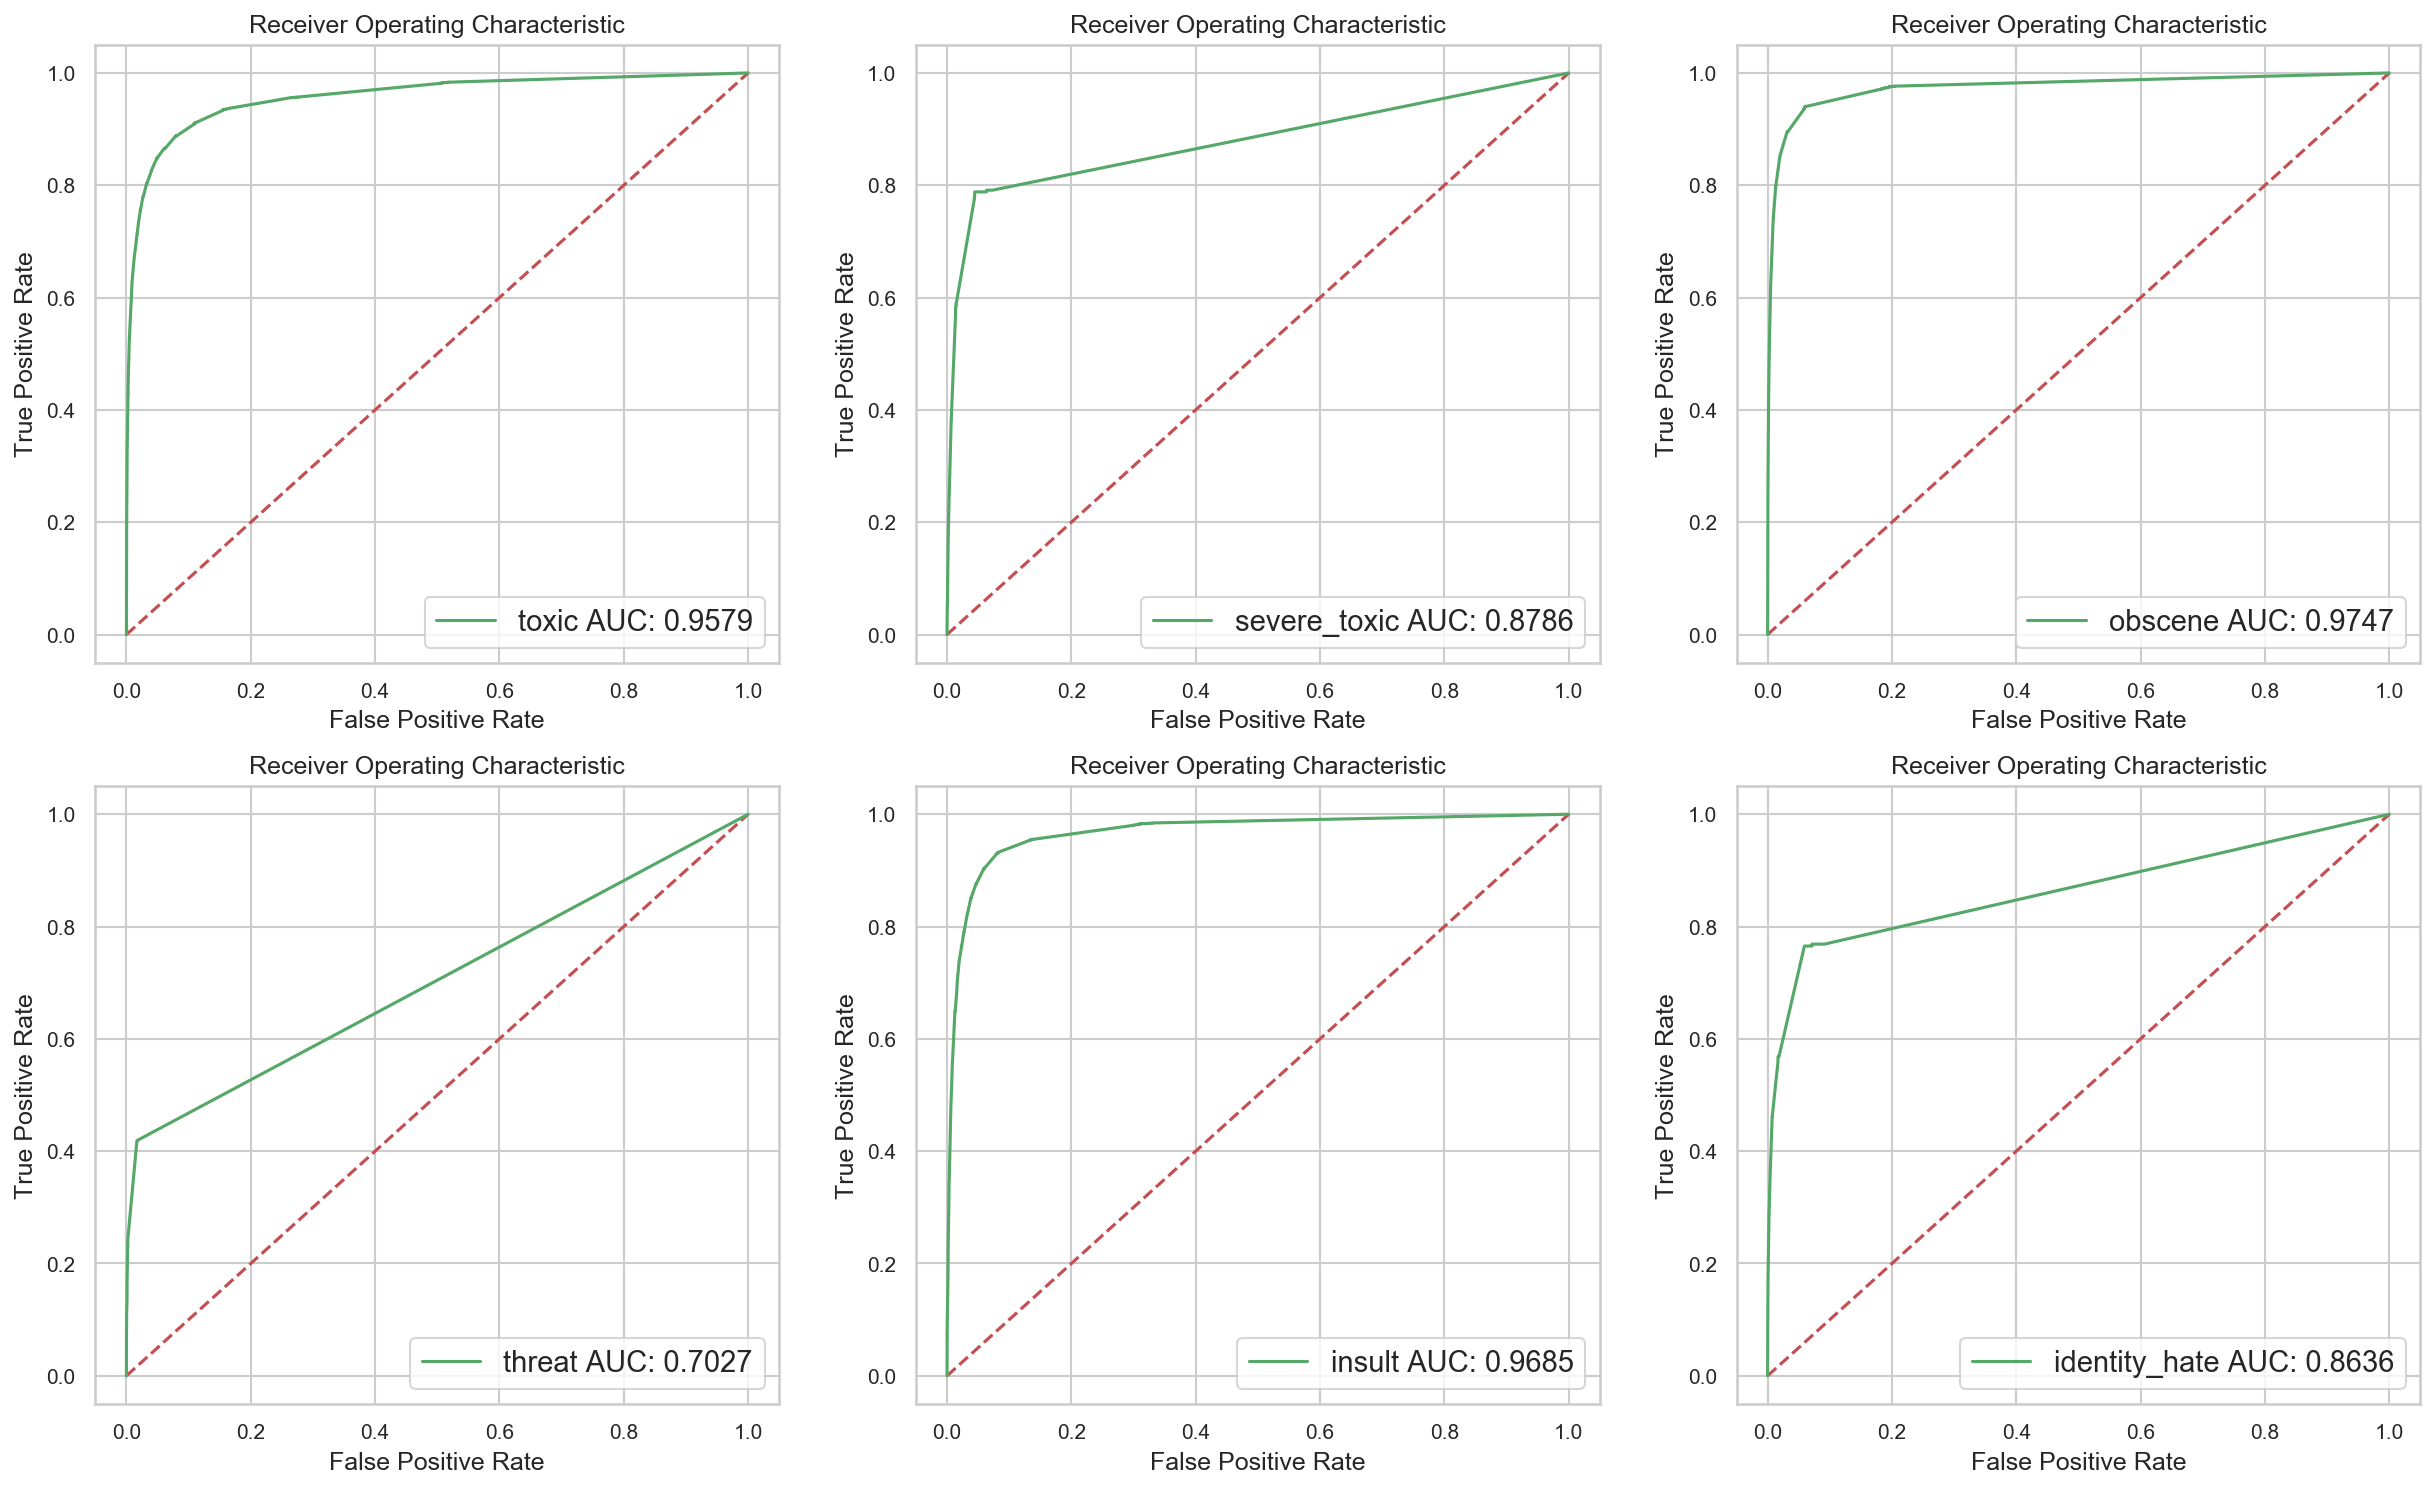

In [77]:
# plot roc curve for each category
fig2, axes = plt.subplots(nrows=2, ncols=3, figsize = (20, 12))
for i, ax in enumerate(axes.flatten()):
    # build each model for each category
    clf = RandomForestClassifier(criterion="entropy", n_estimators=categories[categoryName[i]]).fit(X_train_vec, train[categoryName[i]])
    predictProbs = clf.predict_proba(testSetX_vec)
    
    # set the positive class to be 1
    predictProbs = predictProbs[:, 1]
    fpr, tpr, thresholds = roc_curve(test[categoryName[i]], predictProbs, pos_label=1)
    roc_auc = auc(fpr, tpr)

    label = '{} AUC: {:.4f}'.format(categoryName[i], roc_auc)
    ax.plot([0,1], [0,1], 'r--')
    ax.plot(fpr, tpr, c = 'g', label = label)
    ax.set_title('Receiver Operating Characteristic', fontsize = 12)
    ax.set_xlabel('False Positive Rate', fontsize = 12)
    ax.set_ylabel('True Positive Rate', fontsize = 12)
    ax.legend(loc = 'lower right', fontsize = 14)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=10)

## Apply Random Forest on kaggle test set and compare with validation dataset

In [78]:
testData = pd.read_csv("cleaned_test_data.csv")
testLabel = pd.read_csv("test_labels.csv")
testDataMerge = pd.merge(left=testData,right=testLabel, left_on='id', right_on='id')
testDataMerge[categoryName] = testDataMerge[categoryName]

# drop rows if any column contains -1
selectValidRow = testDataMerge[categories].eq(-1).all(axis=1)
kaggle_test = testDataMerge.mask(selectValidRow).dropna(axis=0)
kaggle_test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,thank you for understanding i think very highl...,0.0,0.0,0.0,0.0,0.0,0.0
7,000247e83dcc1211,dear god this site is horrible,0.0,0.0,0.0,0.0,0.0,0.0
11,0002f87b16116a7f,somebody will invariably try to add religion r...,0.0,0.0,0.0,0.0,0.0,0.0
13,0003e1cccfd5a40a,it says it right there that it is a type the t...,0.0,0.0,0.0,0.0,0.0,0.0
14,00059ace3e3e9a53,before adding a new product to the list make s...,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
kaggle_test.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [80]:
X_train_all = data.comment_text
X_test_kaggle = kaggle_test.comment_text

# Initialise CountVectorizer and fit all the training data
tfidf_vect = TfidfVectorizer(stop_words="english")
X_train_all_vec = tfidf_vect.fit_transform(X_train_all)
print('X_train_all_vec.shape: ', X_train_all_vec.shape)

X_test_kaggle_vec = tfidf_vect.transform(X_test_kaggle)
print('X_test_kaggle_vec.shape: ', X_test_kaggle_vec.shape)

X_train_all_vec.shape:  (159571, 59188)
X_test_kaggle_vec.shape:  (63959, 59188)


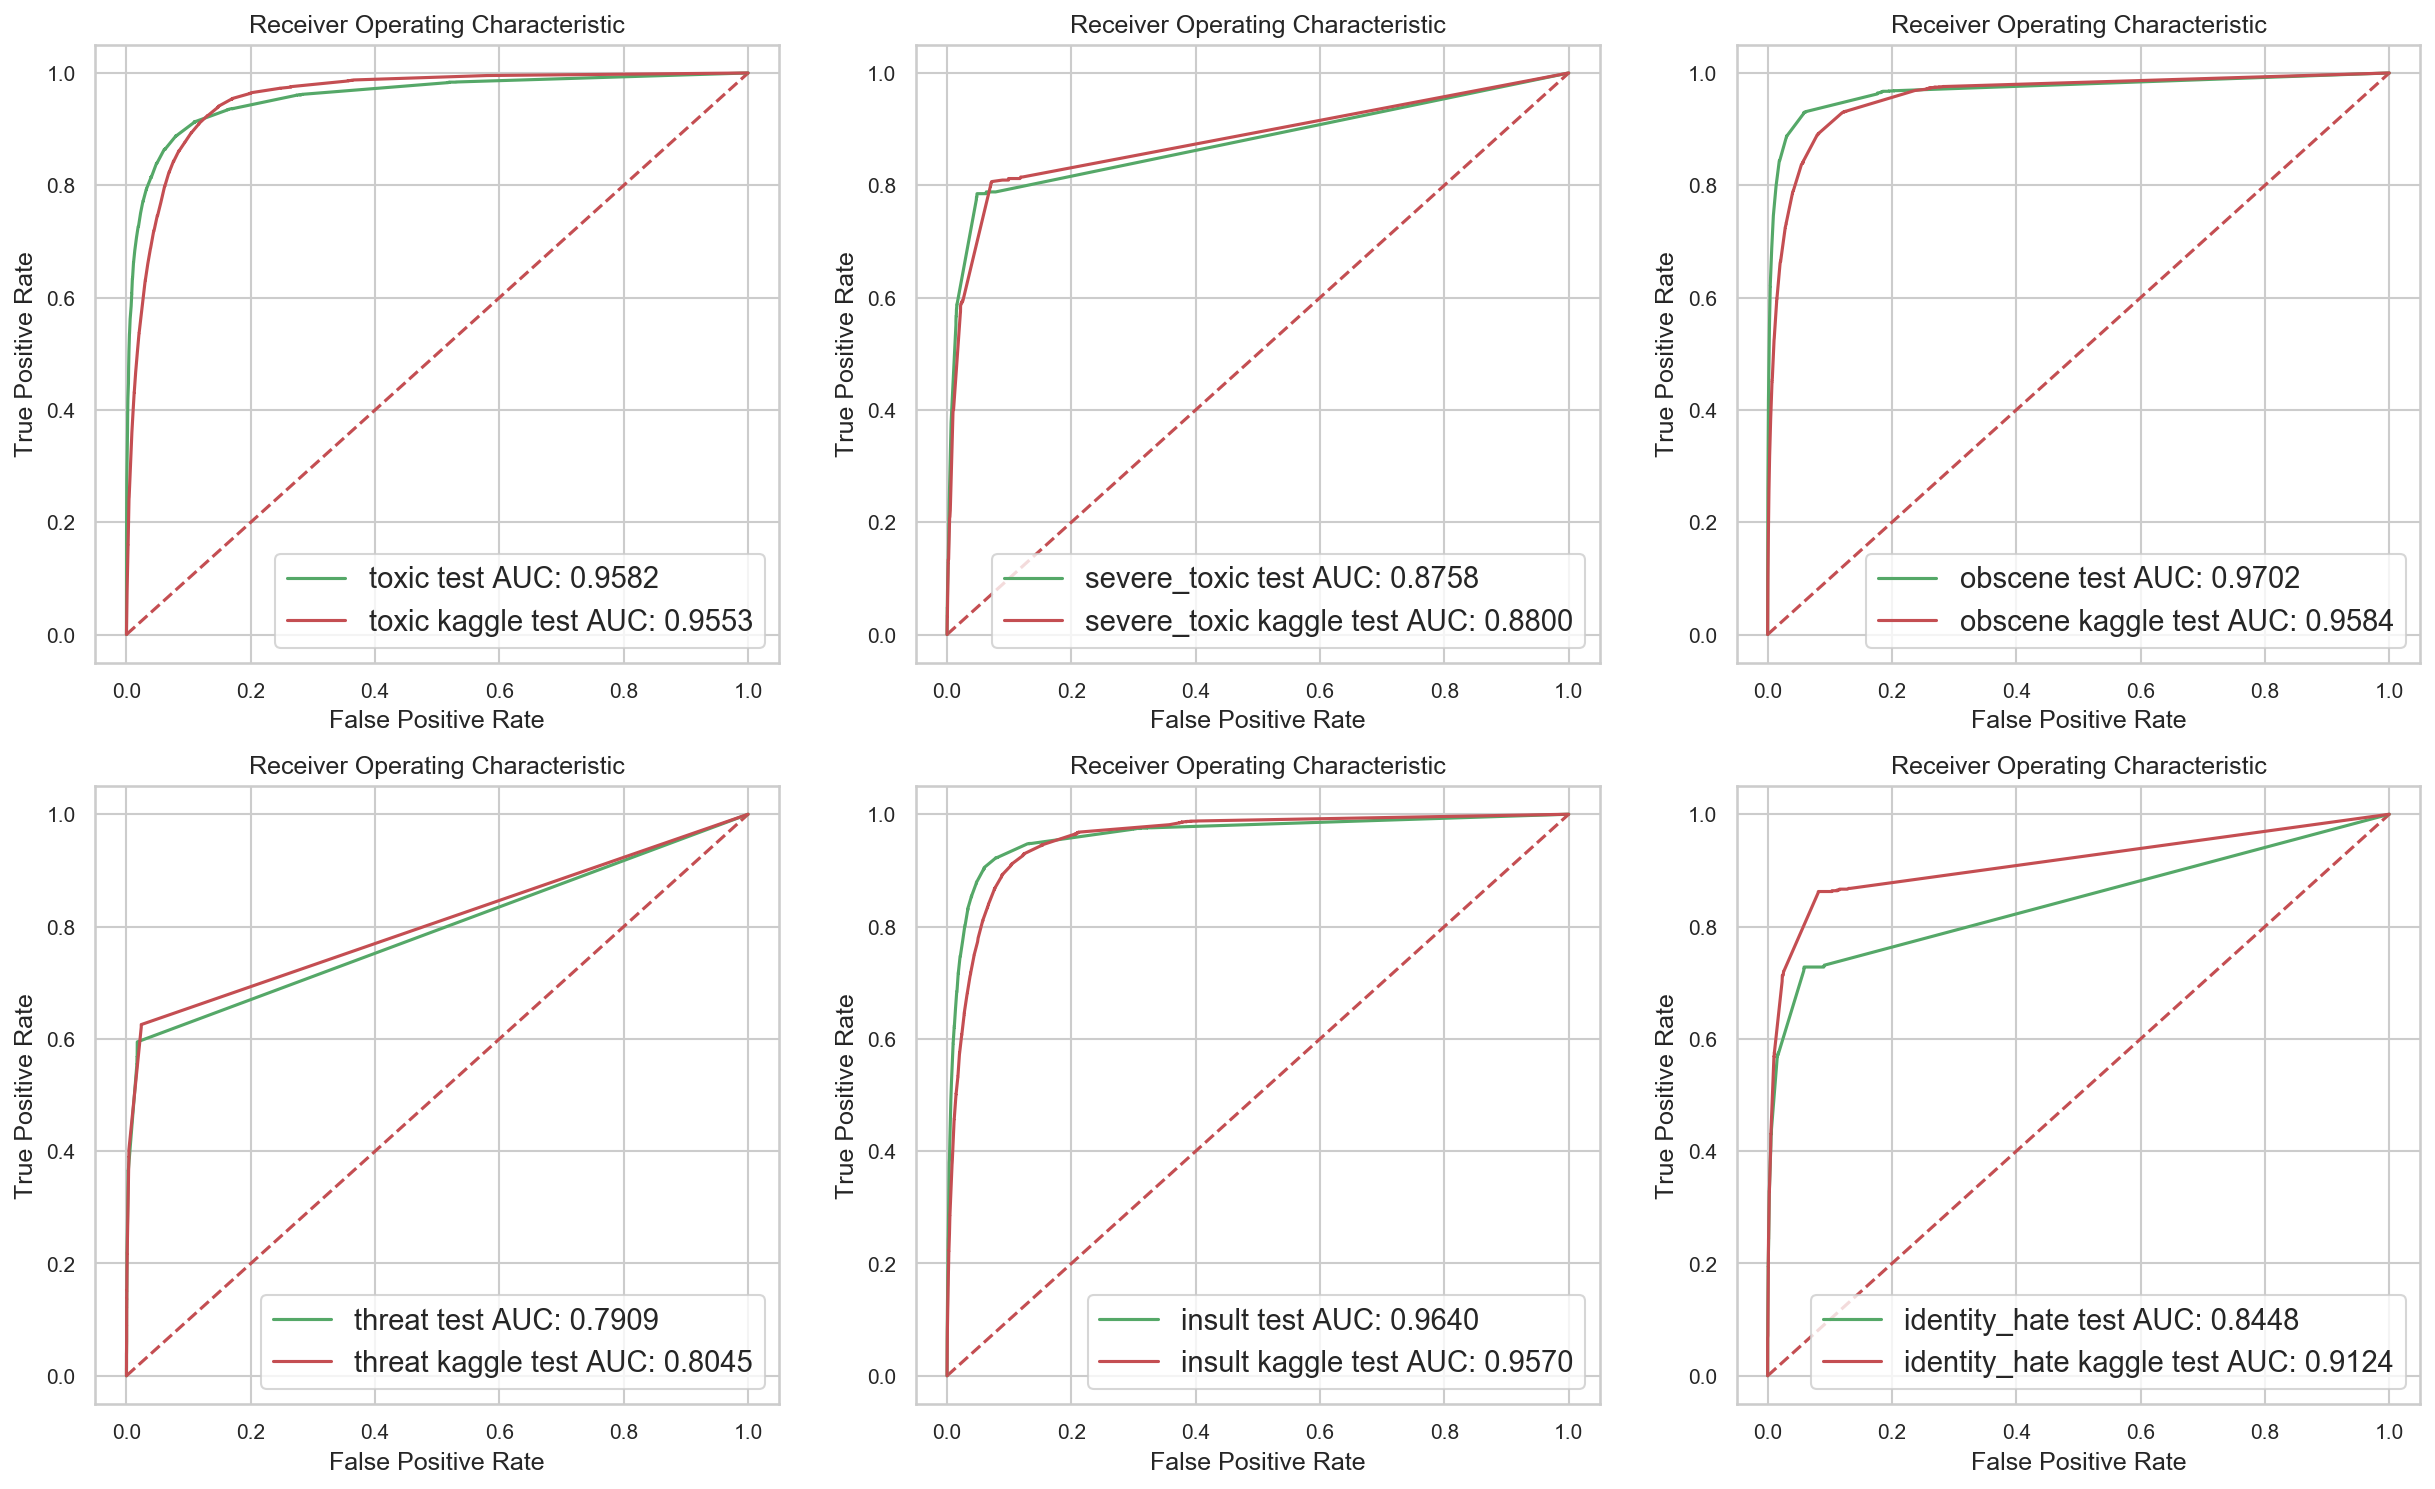

In [81]:
# plot roc curve for each category
fig2, axes = plt.subplots(nrows=2, ncols=3, figsize = (20, 12))
for i, ax in enumerate(axes.flatten()):
    # fit training split validation dataset
    clf = RandomForestClassifier(criterion="entropy", n_estimators=categories[categoryName[i]]).fit(X_train_vec, train[categoryName[i]])
    predictProbs = clf.predict_proba(testSetX_vec)
    predictProbs = predictProbs[:, 1]
    fpr, tpr, thresholds = roc_curve(test[categoryName[i]], predictProbs, pos_label=1)
    roc_auc = auc(fpr, tpr)

    label = '{} test AUC: {:.4f}'.format(categoryName[i], roc_auc)
    ax.plot([0,1], [0,1], 'r--')
    ax.plot(fpr, tpr, c = 'g', label = label)
    ax.set_title('Receiver Operating Characteristic', fontsize = 12)
    ax.set_xlabel('False Positive Rate', fontsize = 12)
    ax.set_ylabel('True Positive Rate', fontsize = 12)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    
    # fit all the training set
    clf = RandomForestClassifier(criterion="entropy", n_estimators=categories[categoryName[i]]).fit(X_train_all_vec, data[categoryName[i]])
    predictProbs = clf.predict_proba(X_test_kaggle_vec)
    predictProbs = predictProbs[:, 1]
    fpr, tpr, thresholds = roc_curve(kaggle_test[categoryName[i]], predictProbs, pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    label = '{} kaggle test AUC: {:.4f}'.format(categoryName[i], roc_auc)
    ax.plot(fpr, tpr, c = 'r', label = label)
    
    ax.legend(loc = 'lower right', fontsize = 14)